In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#import dataset
dataset = pd.read_csv("delivery_time.csv")
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
dataset.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


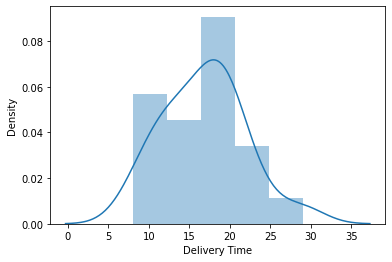

In [6]:
sns.distplot(dataset['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


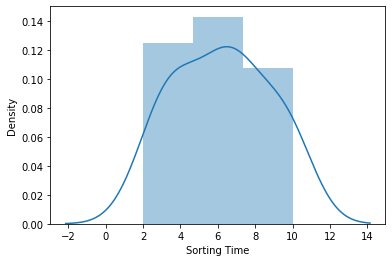

In [7]:
sns.distplot(dataset['Sorting Time'])

In [14]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery Time~Sorting Time",data=dataset).fit()

SyntaxError: ignored

In [15]:
#renaming columns 
dataset=dataset.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
dataset.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [16]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

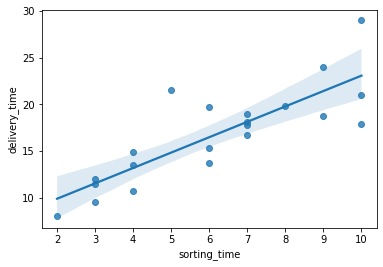

In [17]:
sns.regplot(x="sorting_time",y="delivery_time",data=dataset);

In [18]:
#co efficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [19]:
#t values and p values
print(model.tvalues, '/n' , model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 /n Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [20]:
#rsquared values
(model.rsquared)

0.6822714748417231

In [21]:
#predict for 5 minutes and 8 minutes sorting time 
newdata = pd.Series([5,8])

In [23]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [24]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64